# <font color='red'>**Asembly instructions Intel**<font>

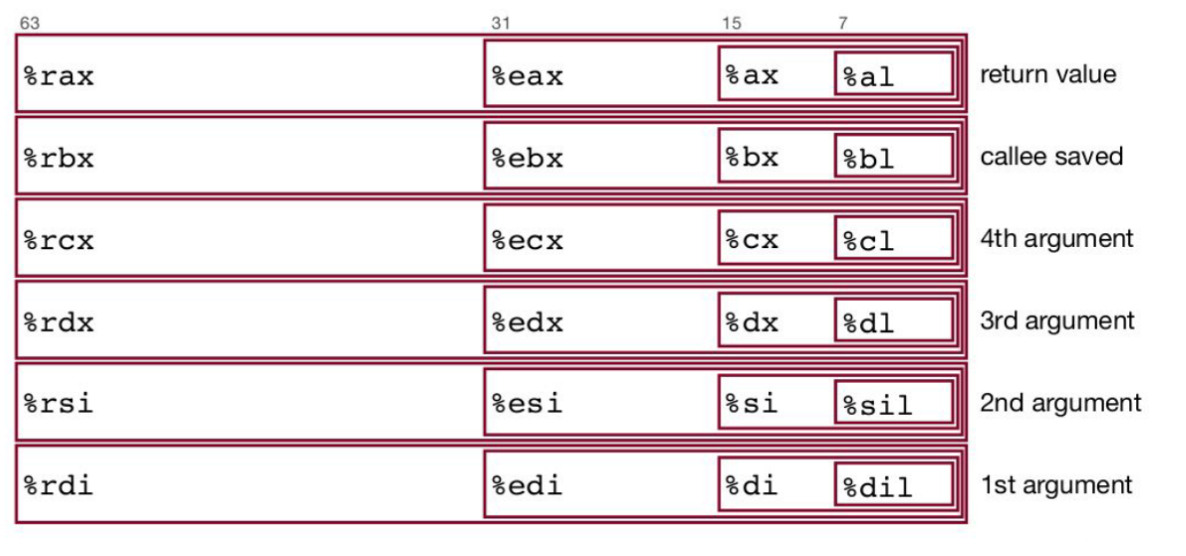
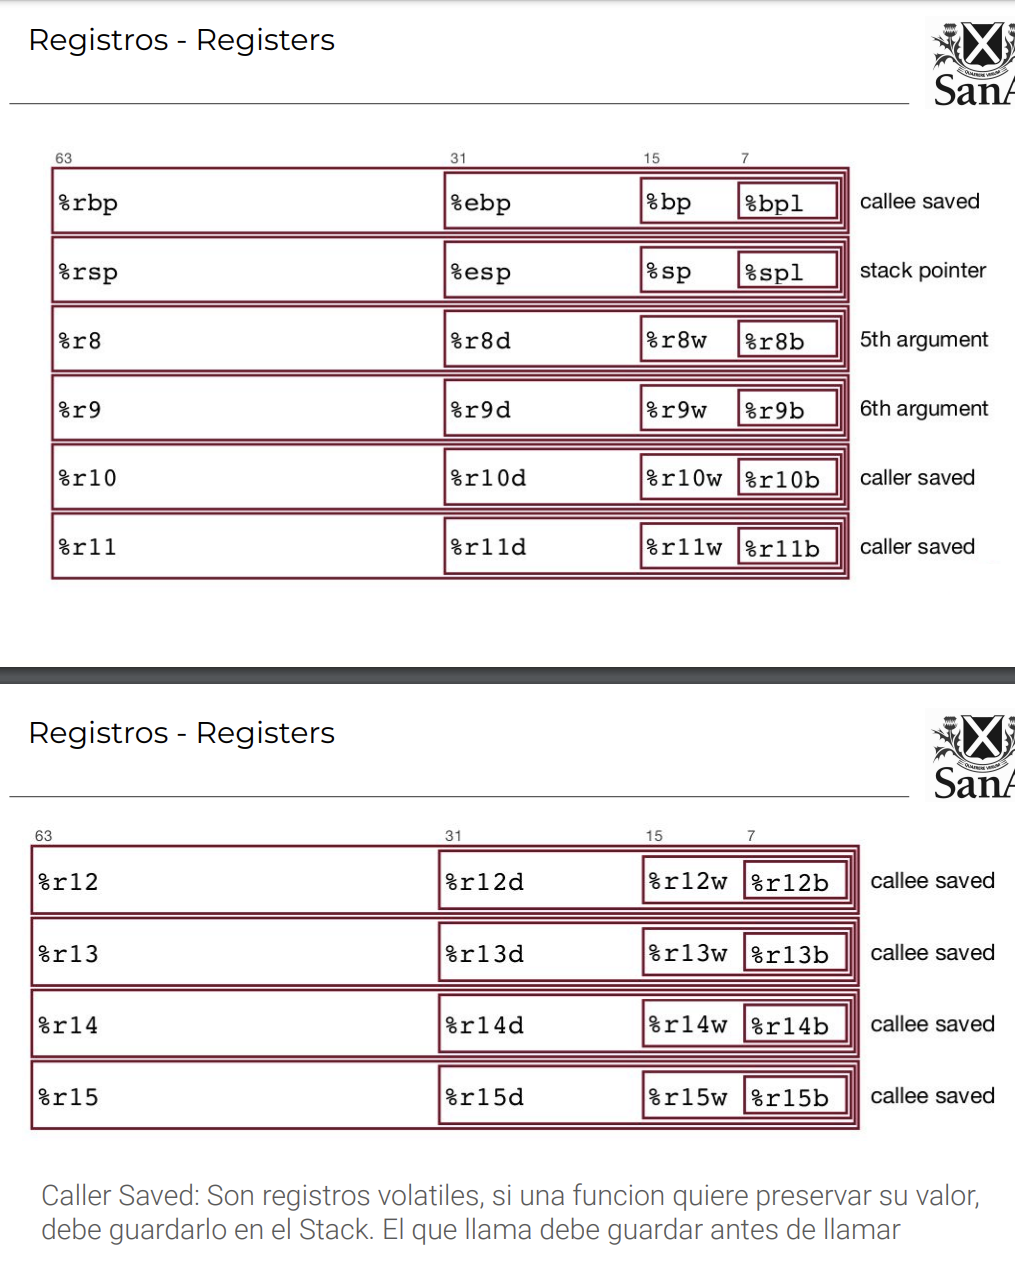

mirar godbolt.org --> compiler explorer https://godbolt.org/

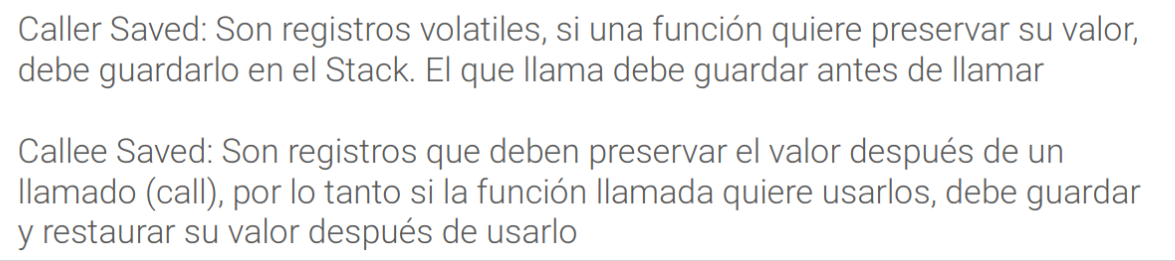

<div style="font-family: 'Source Code Pro'; font-size: 24px;">


This are a common list of registers used in x86-64 assembly language of intel architecture, along with their specific designations and roles.

## **Registers types and usage:**

- **Return Value Register:**

    - %rax: The primary register for returning values from functions. It is also used for some operations where the result needs to be stored temporarily.
    - Variants:
        - %eax (32-bit)
        - %ax (16-bit)
        - %al (8-bit)

- **Function Argument Registers:** These registers are used to pass arguments to functions. In the System V AMD64 ABI (used on Unix-like systems), the first six integer or pointer arguments are passed in the following registers:

    - %rdi: First argument
        - Variants: %edi (32-bit), %di (16-bit), %dil (8-bit)
    - %rsi: Second argument
        - Variants: %esi (32-bit), %si (16-bit), %sil (8-bit)
    - %rdx: Third argument
        - Variants: %edx (32-bit), %dx (16-bit), %dl (8-bit)
    - %rcx: Fourth argument
        - Variants: %ecx (32-bit), %cx (16-bit), %cl (8-bit)

- **Calle-saved register:** These are registers that the called functions must save if it intends to use them. Before the function returns, it must restore these registers to their original values. Examples in the image include:

    - %rbx: This register is preserved across function calls. If a function uses this register, it must save and restore its value.
    - Variants:
        - %ebx (32-bit)
        - %bx (16-bit)
        - %bl (8-bit)
    - %rbp, %ebp, %bp, %bpl
    - %r12, %r12d, %r12w, %r12b
    - %r13, %r13d, %r13w, %r13b
    - %r14, %r14d, %r14w, %r14b
    - %r15, %r15d, %r15w, %r15b

- **Caller-Saved Registers:** These registers do not need to be preserved by the called function. If the caller wants to use their values after a function call, it must save them before the call. Examples include:

    - %r10, %r10d, %r10w, %r10b
    - %r11, %r11d, %r11w, %r11b

- **Stack Pointer:** %rsp (stack pointer register) is used to point to the current top of the stack, with %esp, %sp, and %spl representing different sizes of the stack pointer.

- **Function Arguments:** Registers %r8 and %r9 are used to pass function arguments in the x86-64 calling convention.

    - %r8, %r8d, %r8w, %r8b (5th argument)
    - %r9, %r9d, %r9w, %r9b (6th argument)



## **Explanation of the Register Suffixes:**

- Registers with an r prefix (e.g., %rax, %rbx, %rcx, etc.) denote the full 64-bit version.
- Registers with an e prefix (e.g., %eax, %ebx, %ecx, etc.) are the 32-bit versions.
- Registers without a prefix (e.g., %ax, %bx, %cx, etc.) are the 16-bit versions.
- Registers with an l suffix (e.g., %al, %bl, %cl, etc.) are the 8-bit versions.
- %rbx: 64-bit register
- %ebx: Lower 32 bits of %rbx
- %bx: Lower 16 bits of %rbx
- %bl: Lower 8 bits of %rbx
- The same suffix logic applies to the other registers.

## **Caller Saved Explanation:**

Registers labeled as "caller saved" are volatile; if a function wants to preserve their value, it must save it on the stack. The calling function should save the registers before making a call if it wants to use them afterward.

- Calling Convention: The use of %rdi, %rsi, %rdx, and %rcx as argument registers follows the System V AMD64 calling convention, which is standard for Unix-like operating systems (Linux, macOS).

- Callee-Saved: %rbx is a callee-saved register, meaning if a function modifies this register, it must save the original value and restore it before returning.



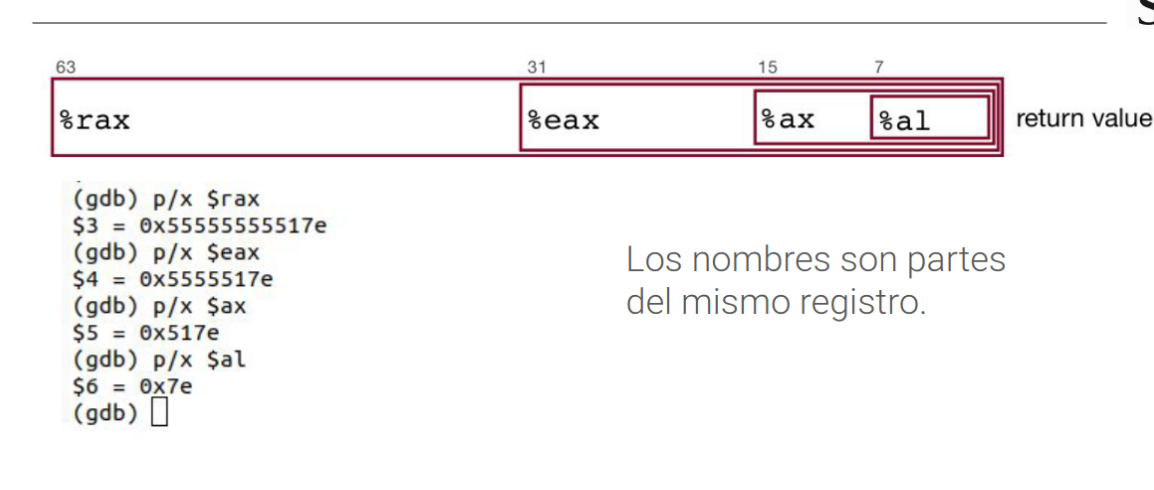

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **Breakdown of the %rax Register:**

- %rax is a 64-bit register. It is often used for arithmetic operations and also serves as the return value register for functions in the x86-64 calling convention.
- %eax refers to the lower 32 bits of %rax.
- %ax refers to the lower 16 bits of %rax.
- %al refers to the lower 8 bits of %rax.

## **Explanation of GDB Commands:**

The image shows several commands from the GNU Debugger (GDB) that demonstrate how different portions of the %rax register can be accessed and viewed:

- p/x $rax: Displays the full 64-bit value of the %rax register in hexadecimal format.

    - Output: $3 = 0x55555555551e

- p/x $eax: Displays the lower 32 bits of %rax (which is %eax) in hexadecimal format.

    - Output: $4 = 0x5555517e

- p/x $ax: Displays the lower 16 bits of %rax (which is %ax) in hexadecimal format.

    - Output: $5 = 0x517e

- p/x $al: Displays the lowest 8 bits of %rax (which is %al) in hexadecimal format.

    - Output: $6 = 0x7e

- Key Points:

    - Shared Register Space: The names (%rax, %eax, %ax, %al) represent different portions of the same physical register. Modifying one part affects the overall register value.
    
    - Register Hierarchy: Higher-order changes in %rax will affect %eax, %ax, and %al, while changes in %al will affect only the lowest 8 bits

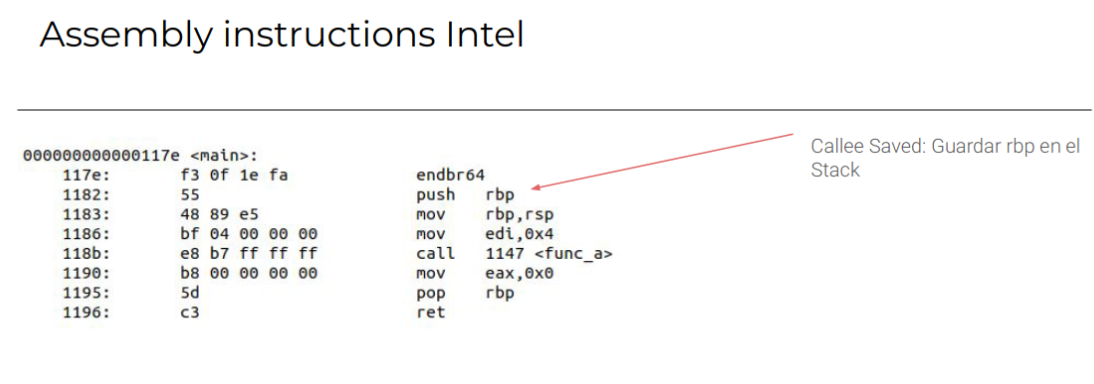
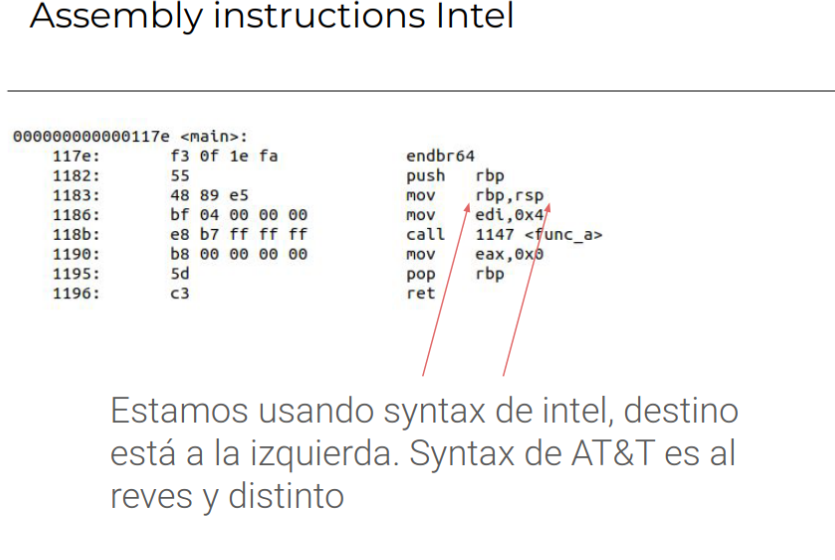
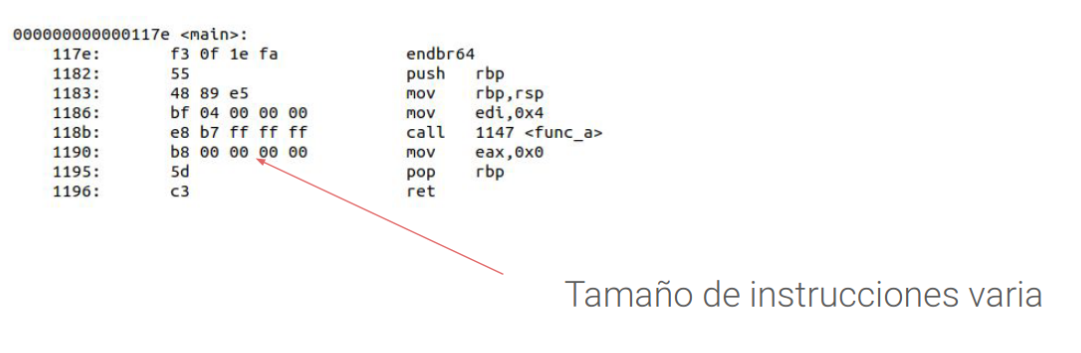
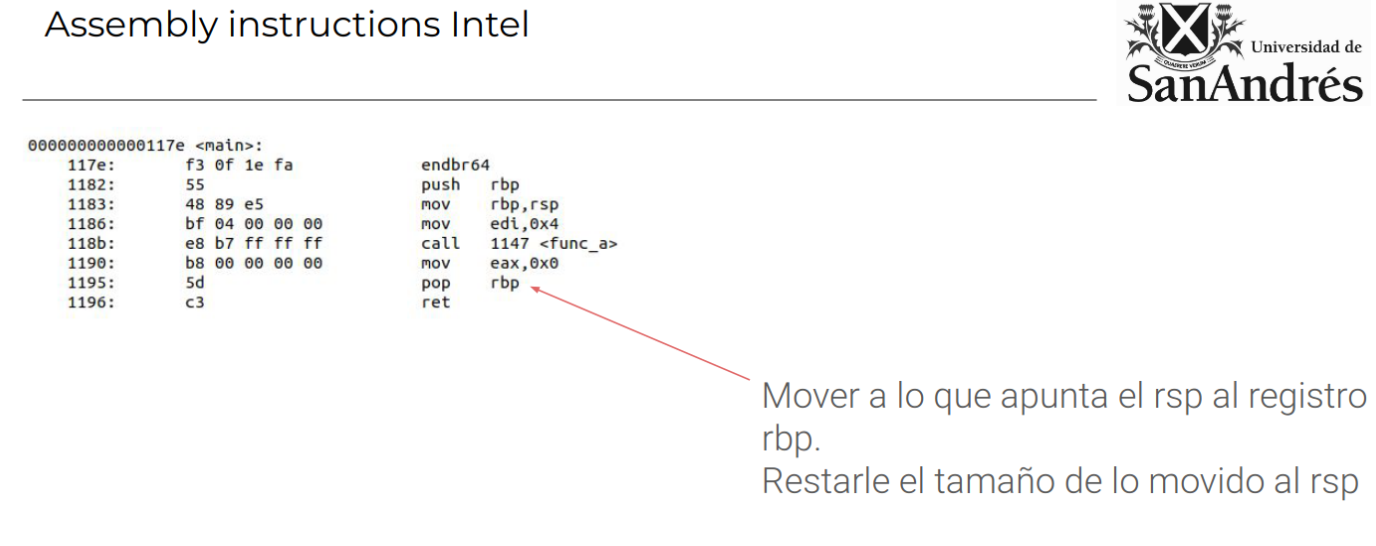


<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **Assembly Code Breakdown for main function:**

- **endbr64 (Opcode: f3 0f 1e fa):**

    - This instruction is part of Intel's Control-flow Enforcement Technology (CET) and is used to mark the start of a function. It's mainly for security purposes to prevent certain types of exploits.

- **push rbp (Opcode: 55):**

    - This instruction pushes the current value of the base pointer register (%rbp) onto the stack. This is a standard prologue in many functions to save the caller's frame pointer.

    - Purpose: Saves the old base pointer so it can be restored later. This is necessary because the function might modify %rbp to create a new stack frame.

- **mov rbp, rsp (Opcode: 48 89 e5):**

    - This instruction copies the current value of the stack pointer register (%rsp) to the base pointer register (%rbp).

    - Purpose: Establishes a new stack frame for the current function. This is a common step in setting up the function's frame pointer.

- **mov edi, 0x4 (Opcode: bf 04 00 00 00):**

    - This instruction moves the immediate value 4 into the %edi register.

    - Purpose: Typically used to pass arguments to functions in accordance with the calling convention. %edi is used for the first integer argument in the System V AMD64 ABI.

- **call 1147 <func_a> (Opcode: e8 b7 ff ff ff):**

    - This instruction calls the function located at address 1147, labeled as <func_a>.

    - Purpose: Transfers control to the func_a function and saves the return address on the stack.

- **mov eax, 0x0 (Opcode: b8 00 00 00 00):**

    - This instruction moves the immediate value 0 into the %eax register.

    - Purpose: Sets the return value of the function to 0. In the context of the main function, this typically signifies successful execution.

- **pop rbp (Opcode: 5d):**

    - This instruction pops the top value from the stack into the %rbp register.

    - Purpose: Restores the caller's frame pointer before returning. This is the counterpart to the earlier push instruction.

- **ret (Opcode: c3):**

    - This instruction returns control to the calling function by popping the return address from the stack and jumping to it.

    - Purpose: Ends the function and returns to the caller.

## **Key Points:**

- Callee-Saved Registers: The use of push rbp and pop rbp is a typical pattern for functions that use the %rbp register to maintain 

- the caller's base pointer. This aligns with the concept of callee-saved registers, where the function must preserve the state of certain registers.

- Function Prologue and Epilogue: The combination of push rbp, mov rbp, rsp, and pop rbp forms the prologue and epilogue of a function, setting up and tearing down the stack frame, respectively.

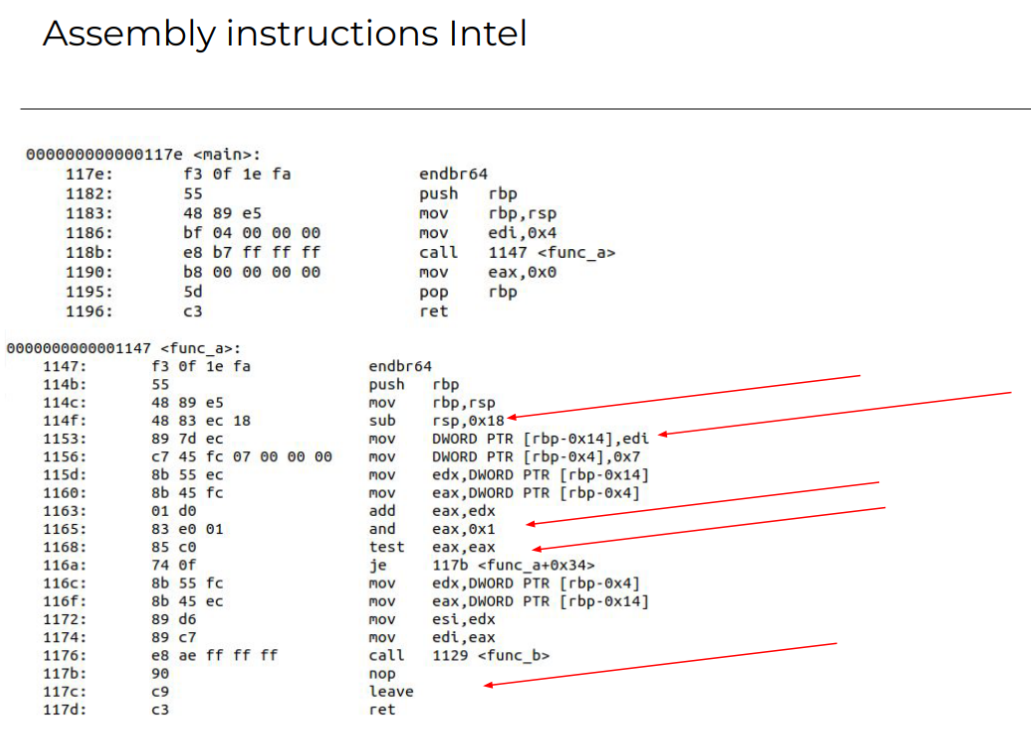
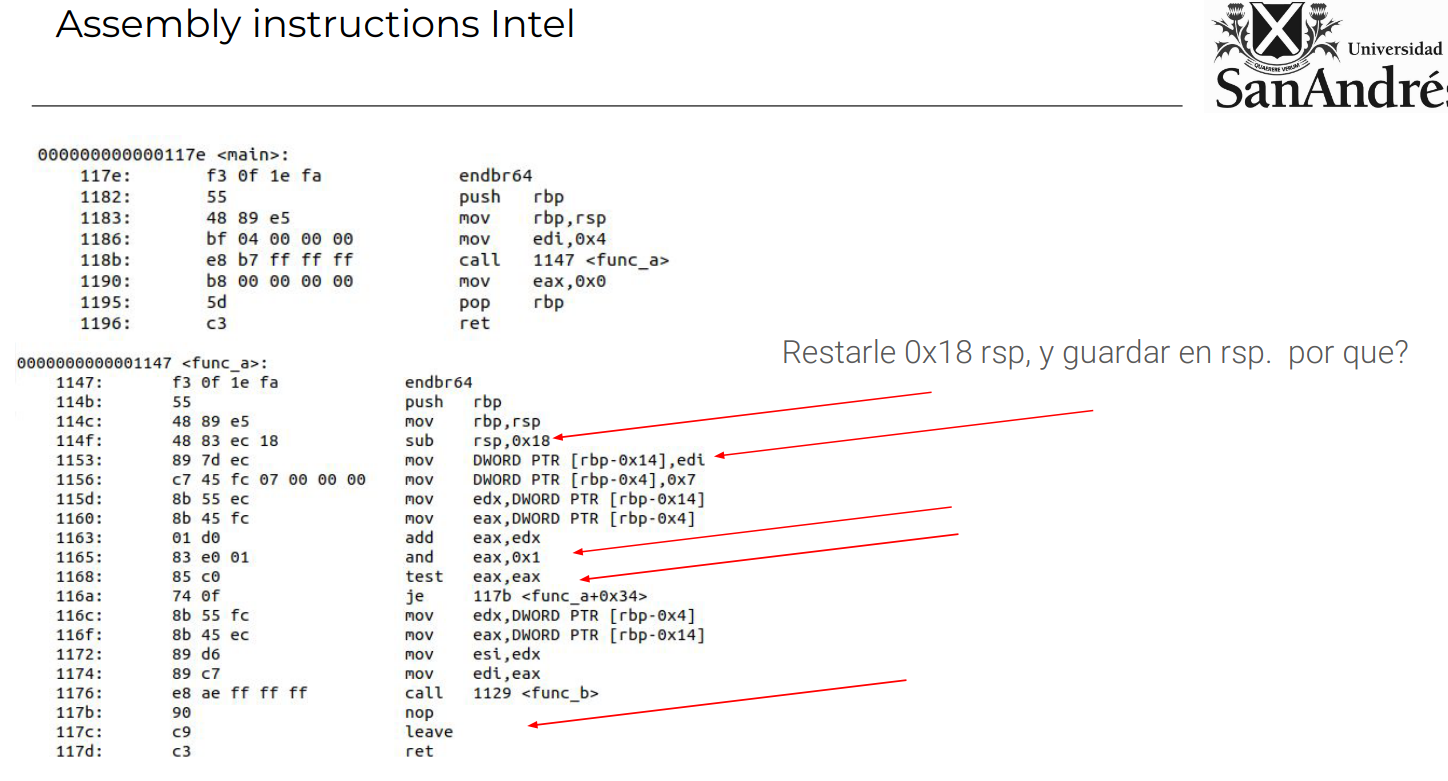
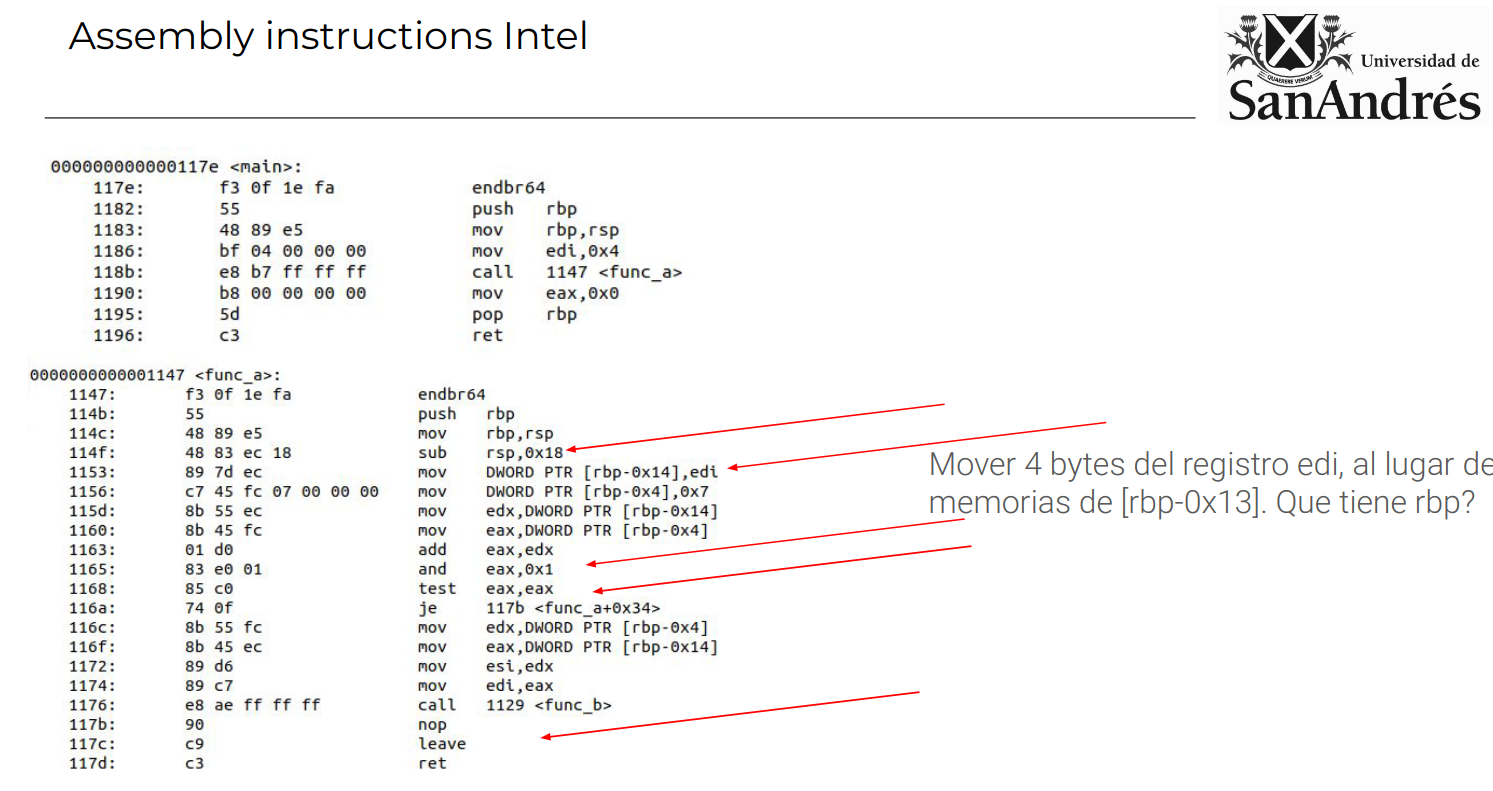
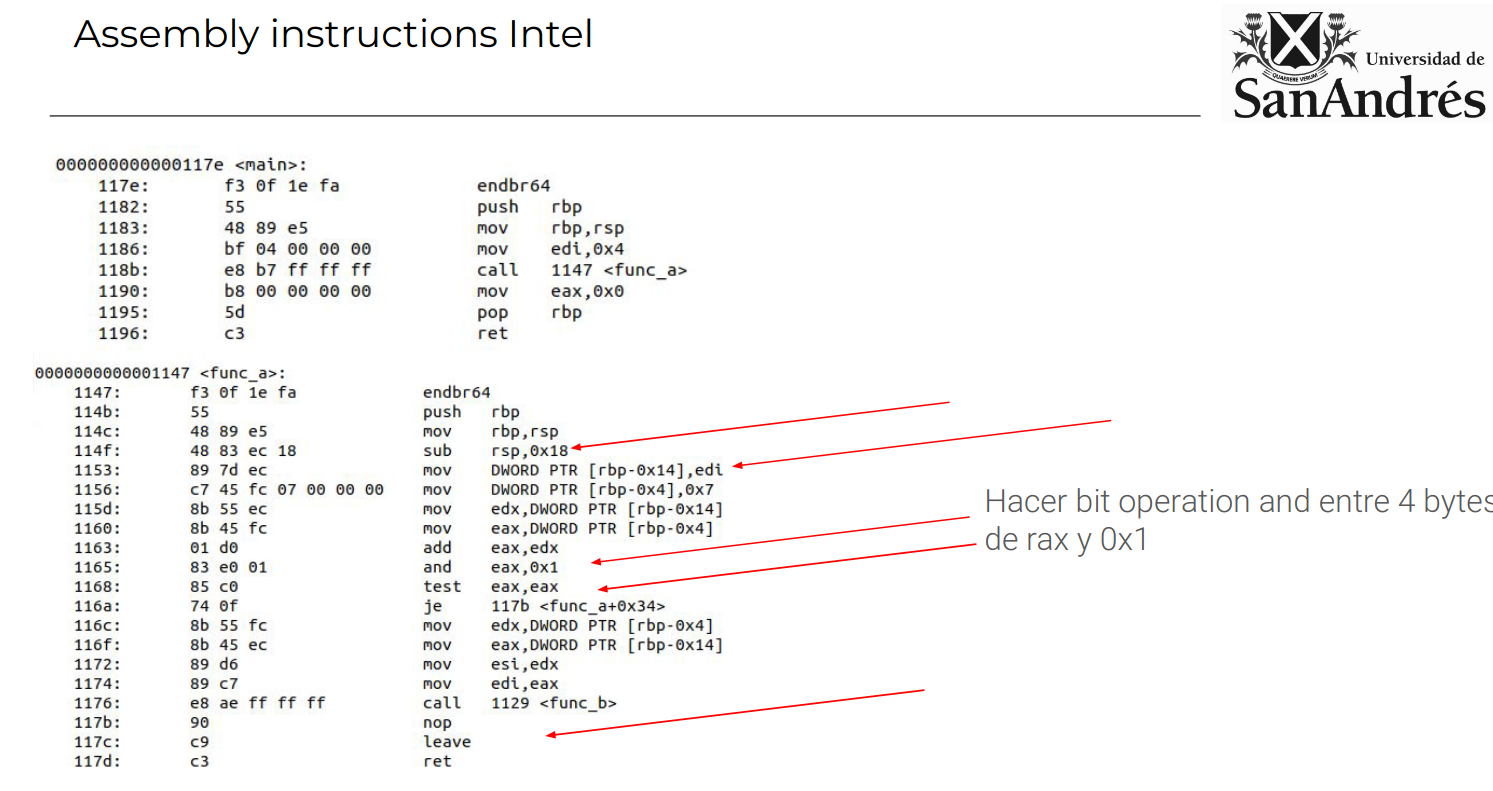
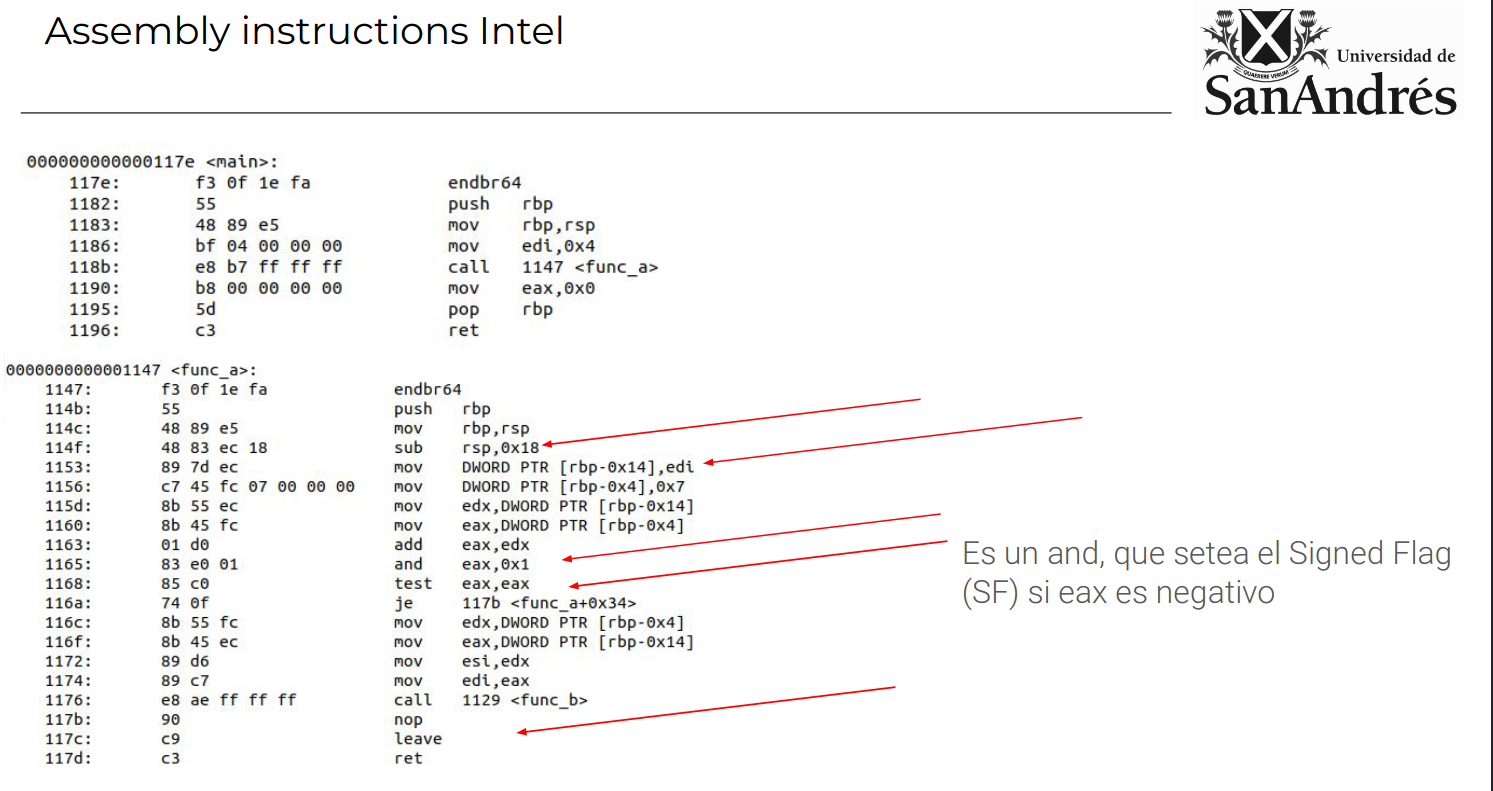
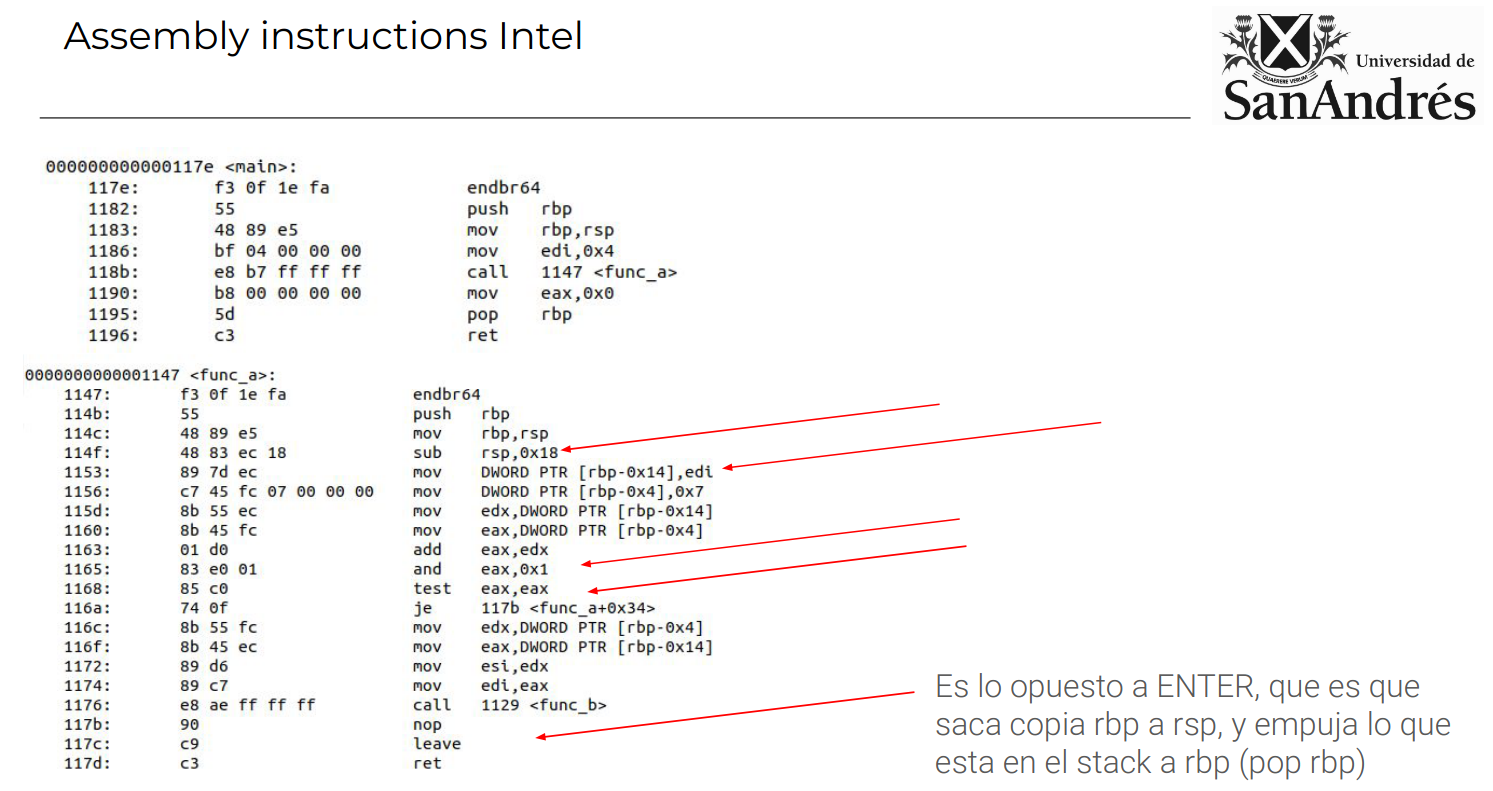

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **Assembly code breakdown for func_a**:

- endbr64 (Opcode: f3 0f 1e fa):

    - Marks the beginning of the function.

- push rbp (Opcode: 55):

    - Saves the base pointer on the stack.

- mov rbp, rsp (Opcode: 48 89 e5):

    - Sets up the stack frame for the function.

- sub rsp, 0x18 (Opcode: 48 83 ec 18):

    - Allocates 24 bytes on the stack for local variables.

- mov DWORD PTR [rbp-0x14], edi (Opcode: 89 7d ec):

    - Moves the value in %edi into the memory location [rbp-0x14] (local variable storage).

- mov DWORD PTR [rbp-0x4], 0x7 (Opcode: c7 45 fc 07 00 00 00):

    - Stores the immediate value 0x7 at the memory location [rbp-0x4].

- mov edx, DWORD PTR [rbp-0x14] (Opcode: 8b 55 ec):

    - Loads the value from memory location [rbp-0x14] into the %edx register.

- mov eax, DWORD PTR [rbp-0x4] (Opcode: 8b 45 fc):

    - Loads the value from memory location [rbp-0x4] into the %eax register.

- add eax, edx (Opcode: 01 d0):

    - Adds the value in %edx to %eax.

- add eax, 0x1 (Opcode: 83 e0 01):

    - Adds the immediate value 1 to %eax.

- test eax, eax (Opcode: 85 c0):

    - Performs a bitwise AND between %eax and itself, updating the condition flags.

- je 117b <func_a+0x34> (Opcode: 74 0f):

    - Jumps to the address 117b (within func_a) if the result of the previous test was zero (if %eax is zero).

- mov edx, DWORD PTR [rbp-0x4] (Opcode: 8b 55 fc):

    - Loads the value from memory location [rbp-0x4] into %edx.

- mov eax, DWORD PTR [rbp-0x14] (Opcode: 8b 45 ec):

    - Loads the value from memory location [rbp-0x14] into %eax.

- mov esi, edx (Opcode: 89 d6):

    - Moves the value from %edx to %esi (sets up the second argument for a function call).

- mov edi, eax (Opcode: 89 c7):

    - Moves the value from %eax to %edi (sets up the first argument for a function call).

- call 1129 <func_b> (Opcode: e8 ae ff ff ff):

    - Calls the function <func_b>.

- nop (Opcode: 90):

    - No operation; used for alignment or to avoid branch prediction penalties.

- leave (Opcode: c9):

    - Restores the stack frame by moving %rbp back to %rsp and then popping %rbp.

- ret (Opcode: c3):

    - Returns from func_a.



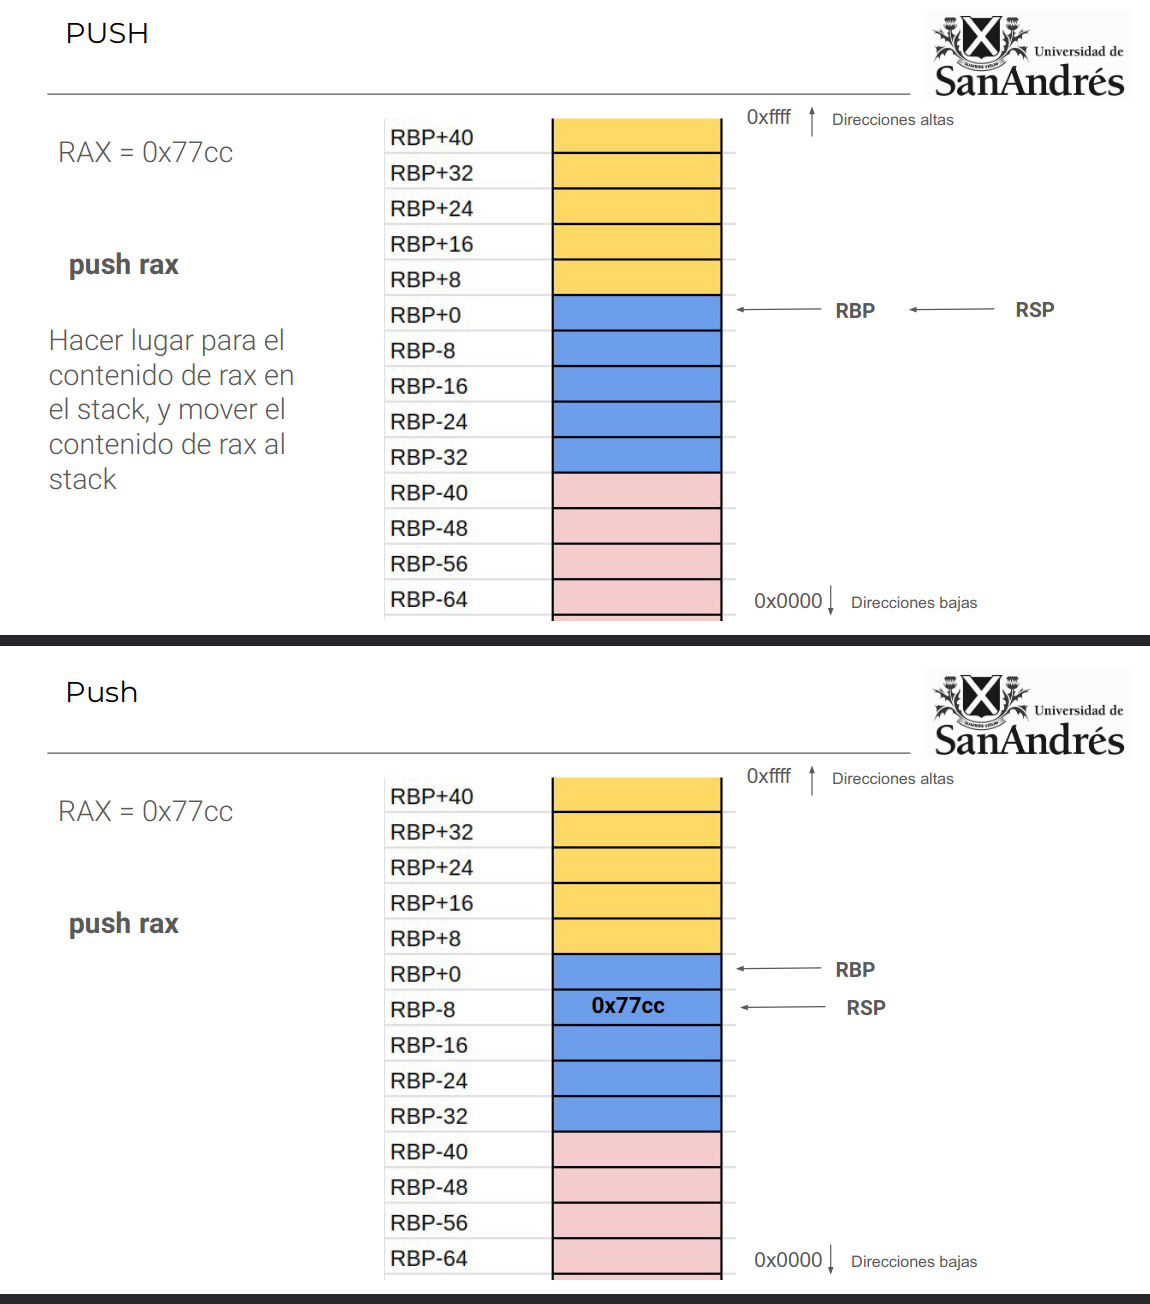

<div style="font-family: 'Source Code Pro'; font-size: 24px;">


The image illustrates the operation of the push instruction in assembly language, specifically how it interacts with the stack and modifies the stack pointer (RSP). The push instruction is commonly used to save register values or local variables onto the stack.

## **PUSH Instruction Overview:**

**Initial State:**

- The stack is shown with various memory addresses, with RBP (base pointer) and RSP (stack pointer) pointing to specific locations on the stack.

- The register RAX has the value 0x77cc.

**Before push rax:**

- The stack pointer (RSP) points to RBP + 0, which is the current top of the stack.

- The memory addresses from RBP + 8 upwards are not occupied by the current function's stack frame.

**After push rax:**

- The push instruction decreases the RSP by the size of the value being pushed (8 bytes for a 64-bit register in x86-64 architecture).

- The value in RAX (0x77cc) is then copied to the memory location now pointed to by the updated RSP (which is RBP - 8).

- The diagram shows the new state of the stack with 0x77cc stored at RBP + 0 and RSP pointing to this new top of the stack.

## **Explanation of Stack Directions:**

1- Stack Growth:

- The stack grows downwards in memory. This means that each push operation decreases the RSP (stack pointer), moving it to a lower memory address.

2- Memory Address Notation:

- Higher addresses (e.g., RBP + 40) are depicted at the top of the diagram.

- Lower addresses (e.g., RBP - 64) are at the bottom of the diagram.

## **Key Points of the PUSH Operation:**

1- push rax:

- Makes space on the stack for the value of RAX by decrementing RSP.

- Moves the content of RAX to the newly allocated space in the stack, effectively saving it for later use.

2- Stack Frames and Stack Management:

- The stack frame is managed using RBP as the frame base, with offsets relative to RBP used to reference local variables and saved register states.

- The stack pointer (RSP) points to the current top of the stack and is dynamically updated as the stack grows or shrinks during function calls and returns.

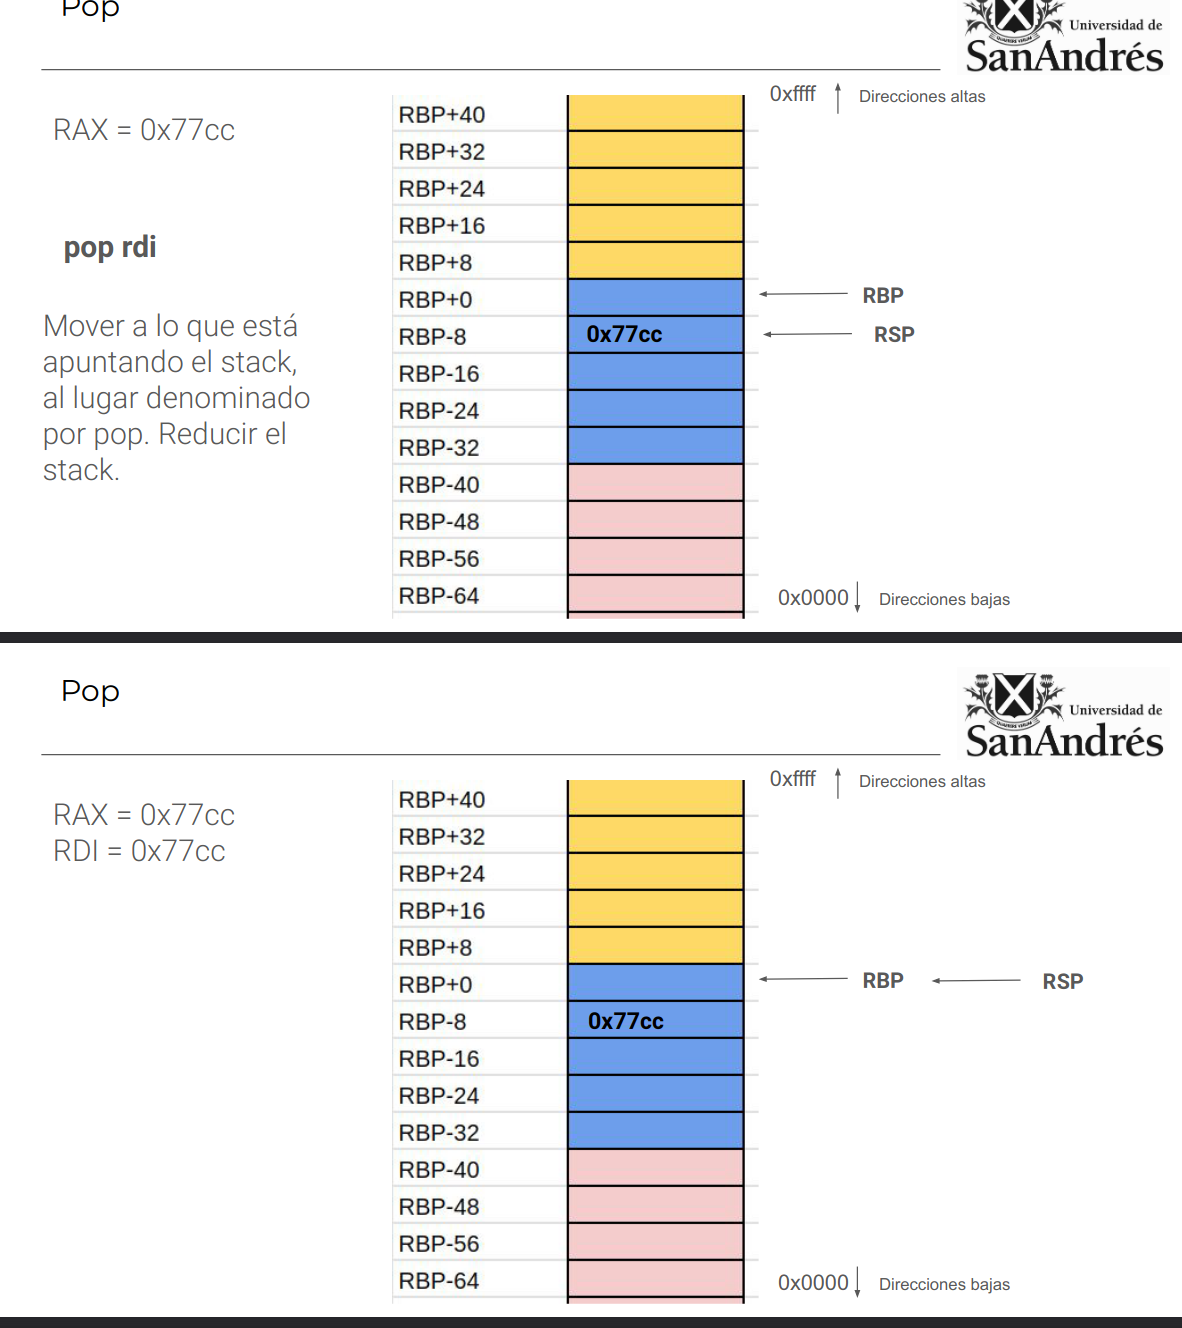

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

The image illustrates the operation of the pop instruction in assembly language, specifically how it interacts with the stack and modifies the stack pointer (RSP). The pop instruction is typically used to restore register values or remove data from the stack.

## **POP Instruction Overview:**

- Initial State:

    - The stack contains a value (0x77cc) stored at the memory location pointed to by RSP (RBP + 0).
    
    - The stack pointer (RSP) points to the top of the stack (RBP + 0).

- Before pop rdi:

    - The value 0x77cc is currently stored at the address pointed to by RSP.
    
    - The instruction pop rdi is about to execute.

- pop rdi:

    - The pop instruction loads the value at the address pointed to by RSP into the destination register (RDI in this case).

    - After the value is loaded into RDI, the stack pointer (RSP) is incremented by the size of the value (8 bytes for a 64-bit value on x86-64 architecture) to point to the next item on the stack.

- After pop rdi:

    - The register RDI now holds the value 0x77cc.

    - The stack pointer (RSP) has been incremented by 8 bytes, moving from RBP + 0 to RBP + 8.

    - The value 0x77cc is still present in the stack memory, but it is no longer considered part of the active stack because RSP no longer points to it.

## **Key Points of the POP Operation:**

- Stack Growth and Shrinkage:

    - The stack grows downward in memory (toward lower addresses) when values are pushed and shrinks upward in memory (toward higher addresses) when values are popped.

- Register Restoration:

    - The pop instruction is often used to restore the value of a register saved earlier with a push instruction.

- Stack Management:
    
    - The pop instruction modifies the stack pointer (RSP), effectively removing the top item from the stack and making the next item the new top.